# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes
#Tenemos dos variables categóricas: ciudad y estado.
#Y una variable númerica con decimales: temperatura

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp.loc[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp.loc[temp['State'] == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp.loc[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp['City'].loc[temp['Temperature']< 15]

1        Albany
2       Buffalo
4    Bridgeport
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
Above_15 = temp.loc[temp['Temperature'] > 15]
Above_15['City'].loc[Above_15['Temperature']<20]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
temp.groupby('State', as_index=False).agg({'Temperature':['mean','std']})

State Temperature          
                      mean       std
0  Connecticut   15.833333  1.964186
1   New Jersey   21.111111  1.571348
2     New York   10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.dtypes
#Cinco categorías nominales: Name, Department, Education, Gender, Title, Years
#Dos categorías numéricas : Years & Salary

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

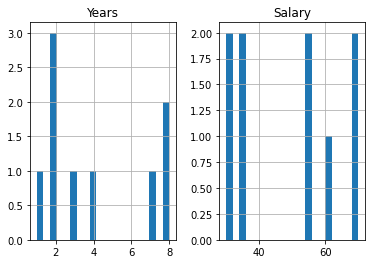

In [13]:
employee.hist(bins=20)

#### What's the average salary in this company?

In [14]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [16]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [17]:
lowest = employee[employee['Salary'] == employee['Salary'].min()]
lowest['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [18]:
David = employee[employee['Name']== 'David']
David

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
David['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [20]:
employee[employee['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
employee[(employee['Title']=='associate')&(employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
employee.groupby('Years', as_index=False).agg({'Salary':'mean'})

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [25]:
employee.groupby('Title', as_index=False).agg({'Salary':'mean'})

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

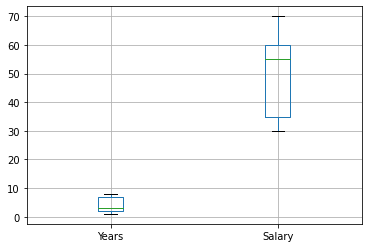

In [26]:
employee.boxplot()

In [27]:
# print first quartile here
employee.quantile(.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [28]:
# print third quartile here
employee.quantile(.50)

Years      3.0
Salary    55.0
Name: 0.5, dtype: float64

#### Is the mean salary per gender different?

In [29]:
employee.groupby('Gender', as_index=False).agg({'Salary':'mean'})
#Siiiii porque vivimos en una sociedad patriarcal jaja :(

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
employee.groupby('Department', as_index=False).agg({'Salary':['min', 'mean', 'max']})

Department Salary           
                min   mean max
0         HR     30  45.00  70
1         IT     30  48.75  70
2      Sales     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
employee.groupby('Department', as_index=False).agg({'Salary': lambda x: x.max()-x.min()})

,Department,Salary
0,HR,40
1,IT,40
2,Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
orders = pd.read_csv('Orders.zip')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [177]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [68]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [69]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [70]:
orders['UnitPrice'].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [71]:
orders['UnitPrice'].max()

8142.75

In [72]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [81]:
Spain = orders[orders['Country'] == 'Spain']['CustomerID'].unique()
Spain

array([12557, 17097, 12540, 12551, 12484, 12539, 12510, 12421, 12502,
       12462, 12507, 12541, 12547, 12597, 12545, 12596, 12354, 12417,
       12455, 12450, 12548, 12556, 12550, 12546, 12454, 12448, 12544,
       12538, 12445, 12442])

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [79]:
len(Spain)

2485

#### Select all the customers who have bought more than 50 items ?

In [80]:
Customers_50 = orders[orders['Quantity']>50]
Customers_50['CustomerID']

46        13748
83        15291
96        14688
102       14688
174       16029
          ...  
397720    18102
397721    16626
397729    16626
397761    15311
397882    13777
Name: CustomerID, Length: 11609, dtype: int64

#### Select orders from Spain that are above 50 items

In [170]:
Spain_orders = orders[orders['Country'] == 'Spain']['Quantity']>50

In [169]:
#Son números de órdenes no clientes, por eso la lista es más larga que la de CustomerIDs
Spain_orders_50 = Spain_orders.index.values.tolist()
Spain_orders_50

[4250,
 4251,
 4252,
 4253,
 4254,
 13974,
 13975,
 13976,
 13977,
 13978,
 13979,
 13980,
 13981,
 13982,
 13983,
 13984,
 13985,
 13986,
 13987,
 13988,
 13989,
 13990,
 13991,
 13992,
 13993,
 13994,
 13995,
 13996,
 13997,
 13998,
 13999,
 14000,
 14001,
 14002,
 14003,
 14004,
 14005,
 14006,
 14007,
 14008,
 14009,
 14010,
 14011,
 14012,
 14013,
 17368,
 17369,
 17370,
 17371,
 17372,
 17373,
 17374,
 17375,
 17376,
 17377,
 17378,
 17379,
 17380,
 17381,
 17382,
 17383,
 17384,
 17385,
 17386,
 17387,
 23288,
 23289,
 23290,
 23291,
 23292,
 23293,
 23294,
 23295,
 23296,
 23297,
 29804,
 29805,
 29806,
 29807,
 29808,
 29809,
 29810,
 29811,
 29812,
 29813,
 29814,
 29815,
 29816,
 29817,
 29818,
 29819,
 29820,
 29821,
 29822,
 29823,
 29824,
 29825,
 29826,
 29827,
 29828,
 29829,
 29830,
 29831,
 29832,
 29833,
 29834,
 29835,
 29836,
 29837,
 29838,
 29839,
 29840,
 29841,
 29842,
 29843,
 29844,
 29845,
 29846,
 29847,
 29848,
 29849,
 29850,
 29851,
 29852,
 29853,
 2985

#### Select all free orders

In [89]:
Free = orders[orders['amount_spent']== 0.000]
print(Free.index)

Int64Index([  6914,  22539,  25379,  29080,  29082,  34494,  53788,  85671,
             92875,  97430, 107192, 128641, 137127, 194648, 197173, 199711,
            208950, 223931, 223932, 223933, 223934, 256263, 259399, 273926,
            286507, 307092, 319882, 320049, 320407, 322279, 328385, 329006,
            329007, 334242, 334243, 352746, 353097, 354170, 358629, 370473],
           dtype='int64')


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [194]:
lunch = orders[orders['Description'].str.contains("lunch bag")]
lunch_orders = lunch.index.tolist() #lista del total de número de órdenes 
len(lunch_orders)
#11556 órdenes de lunch bags

11556

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [217]:
year_2011= lunch[lunch['year']== 2011]
orders_2011 = year_2011.index.tolist() #lista del total de órdenes realizadas en 2011
len(orders_2011) #11234 órdenes realizadas en 2011

11234

#### Show the frequency distribution of the amount spent in Spain.

In [222]:
Spain = orders[orders['Country'] == 'Spain']

In [231]:
Spain_amount= Spain[['amount_spent']]
amount_spent= Spain_amount.value_counts()

#### Select all orders made in the month of August

In [236]:
Aug = orders[orders['month']==8]
August = Aug.index.tolist() #lista de órdenes realizadas en agosto
len(August) # total 27013 órdenes realizadas en agosto

27013

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [261]:
Countries_August = Aug.groupby(by=['Country']).sum()
Countries_August

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,32576265,60302348,215177,856,438,916,12570,242.98,1328565,22489.20
Austria,26212020,49543386,176968,704,208,880,790,279.71,1116970,1516.08
Belgium,58480484,109287235,390134,1552,739,2448,2069,726.14,2406584,3554.02
Canada,1564810,2822140,10055,40,20,55,52,4.99,89220,51.56
Channel Islands,43046490,78948531,281540,1120,287,1570,2009,626.19,2089177,4896.78
Denmark,4739080,9005648,32176,128,48,160,338,42.89,222704,213.15
EIRE,177784872,333975511,1192523,4744,2423,8087,9331,2123.92,8654983,16967.38
Finland,18366395,34362298,122671,488,264,618,693,283.84,768320,1376.50
France,174350986,320802556,1144259,4552,2200,6641,7958,1813.53,7191464,13810.96


#### What's the  average amount of money spent by country

In [275]:
money_count = orders[['Country', 'amount_spent']]
money_country= money_count.groupby(by=['Country']).mean()
money_country

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [287]:
Units = orders[['Description', 'UnitPrice']]
Units_prices= Units.sort_values(by=['Description','UnitPrice'], ascending=False)
Units_prices.head(1)

,Description,UnitPrice
113624,zinc wire sweetheart letter tray,3.75


#### What was the average amount spent per year ?

In [304]:
peryear= orders[['year','amount_spent']]
avg_peryear= peryear.groupby(by=['year']).mean()
avg_peryear

,amount_spent
year,
2010,21.892733
2011,22.430074


In [ ]:
#DONE (: !!